In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer

In [45]:
breast_cancer = load_breast_cancer()

In [46]:
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df["target"] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [47]:
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [48]:
model = LogisticRegression(solver="newton-cg", max_iter=500, random_state=1234)

In [49]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1234, solver='newton-cg')

In [50]:
y_pred = model.predict(X_test)  # Predicted classes (0 or 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

In [51]:
print("Predicted classes                   :", y_pred[:5])
print("Predicted probabilities for class 1 :", y_pred_proba[:5])

Predicted classes                   : [1 1 0 1 0]
Predicted probabilities for class 1 : [9.99342208e-01 9.99973052e-01 6.61149356e-03 9.97097012e-01
 3.67520479e-06]


In [52]:
# Assuming you already have y_pred and y_pred_proba defined
for i in range(5):
    print(f"Sample {i+1}: Predicted class: {y_pred[i]}, Predicted probability for class 1: {y_pred_proba[i]:.4f}")


Sample 1: Predicted class: 1, Predicted probability for class 1: 0.9993
Sample 2: Predicted class: 1, Predicted probability for class 1: 1.0000
Sample 3: Predicted class: 0, Predicted probability for class 1: 0.0066
Sample 4: Predicted class: 1, Predicted probability for class 1: 0.9971
Sample 5: Predicted class: 0, Predicted probability for class 1: 0.0000


In [58]:
# Define a threshold
threshold = 0.8

# Convert probabilities to binary predictions based on the threshold
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Print the first few predictions with thresholding
print("Predicted classes with threshold %.2f:" % threshold, y_pred_threshold[:10])

Predicted classes with threshold 0.80: [1 1 0 1 0 1 1 1 1 1]


In [59]:
# Evaluate performance without thresholding
print("Accuracy without thresholding:", accuracy_score(y_test, y_pred))

# Evaluate performance with thresholding
print("Accuracy with threshold %.2f:" % threshold, accuracy_score(y_test, y_pred_threshold))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_threshold))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_threshold))

Accuracy without thresholding: 0.9824561403508771
Accuracy with threshold 0.80: 0.9912280701754386

Confusion Matrix:
[[40  1]
 [ 0 73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [60]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[39  2]
 [ 0 73]]


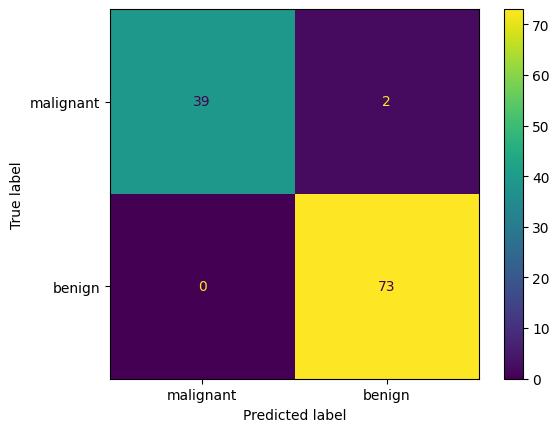

In [61]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=breast_cancer.target_names)
cm_plot.plot();